<a href="https://colab.research.google.com/github/AntoineRuzy/Integrated-Bioinformatic-Project/blob/main/ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Analysis: correlations, clustering and dimensionality reduction**

IBP project | Screening-tool for early stage discovery of bioactive candidates using ML. 

In [1]:
import sklearn
from numpy import where
import pandas as pd
from matplotlib import pyplot
from google.colab import files
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving balancedFinal.csv to balancedFinal.csv


In [3]:
upload = files.upload()

In [70]:
#read the data and print the dimension 
df1 = pd.read_csv(r"balancedFinal.csv", sep=",")
#df2 = pd.read_csv(r"unbalancedFinal.csv", sep=",")
print('Dimension before NA removal:')
print('#rows = ', df1.shape[0]), print('#col = ', df1.shape[1])
df1 = df1.dropna(axis=0)
#df2 = df2.dropna(axis=0)
print('Dimension after NA removal: ')
print('#rows = ', df1.shape[0]), print('#col = ', df1.shape[1])
df1.head(5)

Dimension before NA removal:
#rows =  292
#col =  1879
Dimension after NA removal: 
#rows =  292
#col =  1879


,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,...,De,L1p,L2p,L3p,P1p,P2p,E1p,E2p,E3p,Tp,Ap,Vp,Kp,Dp,L1i,L2i,L3i,P1i,P2i,E1i,E2i,E3i,Ti,Ai,Vi,Ki,Di,L1s,L2s,L3s,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,10,22,16,6,0,9,2,2,1,0,0.0,2.0,0.0,0.0,2.0,4866.470694,3285.911675,5125.915532,5823.261916,4023.627644,3755.414546,2366.160564,2010.701122,1851.892400,6349.023301,7253.070731,10367.565415,10340.266164,7838.209328,6365.402729,...,1.413581,11.445241,1.176596,0.258144,0.888607,0.091351,0.563188,0.284529,0.217283,12.879982,16.724678,33.080940,0.832910,1.065000,11.312779,1.437079,0.345254,0.863893,0.109742,0.548770,0.423822,0.448298,13.095112,20.659296,39.367328,0.795840,1.420891,11.688495,1.325009,0.348914,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,12,31,18,13,0,13,2,1,1,0,0.0,0.0,1.0,0.0,1.0,9065.915841,3905.568826,5680.398994,6633.296591,5370.358053,3698.544856,3127.935587,2890.234735,4082.689219,7739.752888,9009.086446,12129.769040,12295.294407,10303.119687,8950.141038,...,1.434107,16.154816,1.937974,0.569152,0.865656,0.103846,0.482243,0.533074,0.208126,18.661941,41.605152,78.085876,0.798484,1.223443,17.856844,1.913562,0.790178,0.868499,0.093069,0.589039,0.508048,0.436256,20.560585,49.792328,97.353445,0.802748,1.533343,17.690543,1.835237,0.746796,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,10,24,16,8,0,10,2,2,0,0,0.0,2.0,0.0,0.0,2.0,4868.502822,3310.125851,5175.359948,5908.016572,4138.596092,3805.875026,2418.653172,2153.635522,1851.892400,6411.190790,7482.543964,10857.595624,11041.939075,8687.377805,6886.516683,...,1.303480,11.450959,1.168955,0.327426,0.884426,0.090285,0.619005,0.292564,0.145712,12.947340,17.517751,34.847909,0.826638,1.057281,10.717133,1.409146,0.506650,0.848349,0.111545,0.540422,0.426244,0.372027,12.632930,21.245790,41.530153,0.772523,1.338693,10.934821,1.303764,0.486393,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,0,86,34,52,0,30,0,4,0,0,0.0,0.0,0.0,0.0,0.0,5404.630962,6175.020141,10569.200499,13928.758477,13530.953189,12097.098300,10334.456402,9302.450418,8506.558222,15187.424871,21022.387874,36014.128236,51007.246921,57789.310825,54153.421222,...,1.462925,13.356831,4.713860,1.551971,0.680684,0.240225,0.480137,0.404662,0.310977,19.622663,91.007428,208.345661,0.521026,1.195776,14.202111,5.192340,1.924706,0.666167,0.243553,0.542372,0.492669,0.478277,21.319157,111.070800,274.321969,0.499250,1.513318,14.162502,5.110835,1.876100,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,30,52,33,19,0,27,2,3,0,0,0.0,1.0,0.0,0.0,1.0,6331.435084,6142.860146,9234.538103,9868.519933,9714.146137,9004.759376,7164.482540,7034.156940,7315.727153,13665.319127,16934.930973,24849.027523,27613.596117,26181.310788,23695.728859,...,1.562560,32.678344,1.875418,1.309409,0.911195,0.052294,0.519289,0.277799,0.326617,35.863171,106.530578,222.641628,0.866793,1.123705,35.436934,2.242259,1.712113,0.899613,0.056923,0.609762,0.443232,0.586587,39.391306,143.969814,319.403533,0.849420,1.639581,35.140178,2.228841,1.614423,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847


In [65]:
X1 = df1.drop(columns = ['cid','Activity', 'smiles', 'acvalue'], axis = 0)
#X2 = df2.drop(columns = ['id','Activity', 'canonical_smiles', 'standard_value', 'Unnamed: 0'], axis = 0)

y1 = df1['Activity']
#y2 = df2['Activity']

y1.replace({'active':1, 'Inactive':0, 'inactive':0}, inplace = True)
#y2.replace({'active':1, 'Inactive':0, 'inactive':0}, inplace = True)

y1 = pd.DataFrame(y1)
X1 = pd.DataFrame(X1)

#y2 = pd.DataFrame(y2)
#X2 = pd.DataFrame(X2)

In [ ]:
#combining the two df, only to assess the two combined
X12 = pd.concat([X1, X2])
y12 = pd.concat([y1, y2])

print('Dimension: ')
print('#rows = ', X12.shape[0]), print('#col = ', X12.shape[1])
print('#rows = ', y12.shape[0]), print('#col = ', y12.shape[1])
X12

**Invstigate the scatterplot of some interesting features**

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


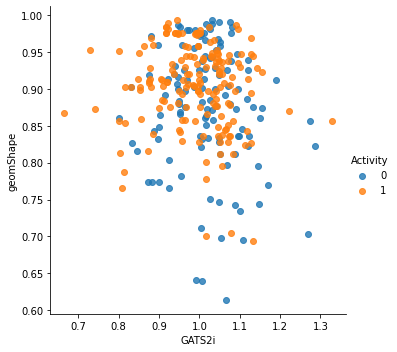

In [7]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

#define the model
facet = sns.lmplot(data=df1, x='GATS2i', y='geomShape', hue= 'Activity', 
                   fit_reg=False, legend=True, legend_out=True)

**Principal Component Analysis**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


In [109]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaledX = scaling.fit_transform(X1)
 
# Set the n_components
principal=PCA(n_components=5)
principal.fit(scaledX)
x=principal.transform(scaledX)
 
# Check the dimensions of data after PCA
print(x.shape)
pd.DataFrame(scaledX)

(292, 5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
0,0.454278,2.017092,0.995723,-0.442582,-1.754194,-1.404310,-1.371138,-1.697341,-1.981507,-1.355414,0.0,-2.369953,-0.148021,-1.218991,2.902403,-0.131991,-0.466959,2.523677,-0.101885,0.0,1.176284,-0.717567,-1.746413,-1.570616,-1.413577,-2.216589,-1.882248,-2.055836,-2.466128,-1.705251,-1.972782,-1.981493,-1.856670,-1.659330,-1.590691,-1.537789,-1.527750,-1.583890,-1.576161,-1.733439,...,0.676223,-0.848859,-1.314038,-0.959982,0.668989,-0.622146,1.852965,-0.907293,0.354260,-1.009453,-1.104346,-0.974979,0.670411,0.612365,-0.986672,-1.447766,-1.059234,0.443162,-0.398060,-0.969908,-0.931124,1.040704,-1.166426,-1.238336,-1.069640,0.443319,0.132532,-0.935533,-1.482278,-1.017527,0.573722,-0.558415,0.116288,-2.072543,1.515830,-1.115030,-1.204620,-1.042604,0.573894,0.595923
1,-1.618365,3.052423,3.936248,-0.484904,-1.154814,-0.788298,-1.029086,-1.129616,-1.661838,-0.701539,0.0,-1.613226,-0.148021,-2.115578,2.902403,-0.131991,-0.466959,-1.604691,9.814955,0.0,-0.260850,3.050500,-1.247970,-1.292214,-1.064747,-1.605012,-1.908349,-1.681725,-1.968248,-0.667493,-1.444958,-1.510295,-1.579703,-1.444881,-1.362856,-1.294038,-1.241503,-1.269854,-1.138228,-1.293642,...,0.893645,-0.452308,-0.686189,-0.268938,0.336471,-0.416292,0.105396,4.141934,0.237188,-0.527362,-0.648205,-0.601668,0.336539,2.021131,-0.473859,-1.066098,-0.213289,0.507687,-0.672122,-0.133413,0.959540,0.917145,-0.584173,-0.794326,-0.703110,0.507951,1.256858,-0.466625,-1.073565,-0.238553,0.544249,-0.700445,-0.061088,0.617446,0.818130,-0.577908,-0.789206,-0.701154,0.544397,1.020383
2,0.454278,1.157552,-0.368398,-0.619970,-1.742102,-1.404310,-1.371138,-1.571180,-1.981507,-1.168592,0.0,-2.180771,-0.148021,-1.218991,-0.320037,-0.131991,-0.466959,2.523677,-0.101885,0.0,1.176284,-0.715744,-1.726936,-1.545790,-1.377079,-2.164379,-1.859088,-2.030056,-2.385217,-1.705251,-1.949188,-1.919917,-1.779652,-1.582362,-1.512201,-1.488646,-1.465803,-1.523067,-1.576161,-1.615368,...,-0.490011,-0.848378,-1.320339,-0.806041,0.608409,-0.639697,3.058022,-0.744060,-0.560852,-1.003837,-1.089806,-0.960322,0.609584,0.543732,-1.033348,-1.470140,-0.752368,0.225382,-0.368408,-1.143326,-0.876753,0.258115,-1.202473,-1.229398,-1.055969,0.225179,-0.689294,-0.994414,-1.499296,-0.748371,0.356918,-0.504149,-0.412860,-1.932411,0.227278,-1.164577,-1.201833,-1.035653,0.356923,-0.816925
3,-1.618365,1.485302,0.036486,3.204966,1.979705,-3.252346,-3.081401,2.339811,0.895510,2.941475,0.0,1.602860,-1.542280,0.574184,-0.320037,-0.131991,-0.466959,-1.604691,-0.101885,0.0,-1.697984,-0.234688,0.577542,1.162416,2.076944,2.100878,1.946313,1.857429,1.661537,1.390476,1.381659,1.713277,2.174228,2.801472,3.026359,2.968823,2.855512,2.776230,2.632820,2.150537,...,1.198898,-0.687901,1.602869,1.914839,-2.343399,1.830430,0.059922,1.533236,1.552249,-0.447259,0.257501,0.478820,-2.354238,1.775136,-0.760255,1.560236,1.943817,-2.327047,1.801564,-1.102814,0.614315,1.348307,-0.525010,0.139606,0.415506,-2.331466,1.056642,-0.742252,1.550319,1.972399,-2.311766,1.786368,-0.944345,0.779348,1.471430,-0.509750,0.156198,0.424153,-2.313813,1.303387
4,0.454278,1.153268,-0.372750,-0.835791,0.498915,2.291761,2.049386,0.195074,0.735675,-0.141076,0.0,1.035316,-0.148021,-0.322403,-0.320037,-0.131991,-0.466959,0.459493,-0.101885,0.0,-0.260850,0.596912,0.551673,0.492292,0.328458,0.367589,0.527030,0.300641,0.377516,0.836505,0.803974,0.616475,0.419397,0.235399,0.104788,0.096534,0.098443,0.228173,0.474566,0.171648,...,2.254271,0.938991,-0.737774,1.375878,0.996245,-1.265575,0.905198,-1.044010,1.752225,0.906850,0.542091,0.597403,0.998998,1.134331,0.903772,-0.802809,1.539610,0.943607,-1.266312,0.297054,-0.495419,2.459637,0.884489,0.641013,0.700466,0.944591,2.319046,0.89

In [110]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.02899287,  0.00408261,  0.00676099, ...,  0.03551615,
        -0.00462319,  0.01251316],
       [ 0.0039757 ,  0.02779153, -0.00507631, ..., -0.02101984,
        -0.05174393, -0.00133131],
       [ 0.01032086, -0.04662308, -0.00898089, ...,  0.00300444,
        -0.01281706, -0.02589768],
       [-0.00695572,  0.03958904, -0.01770222, ...,  0.02013404,
         0.00570672,  0.01784768],
       [-0.00143119,  0.04369656,  0.05266496, ...,  0.00527978,
        -0.0392027 ,  0.01113486]])

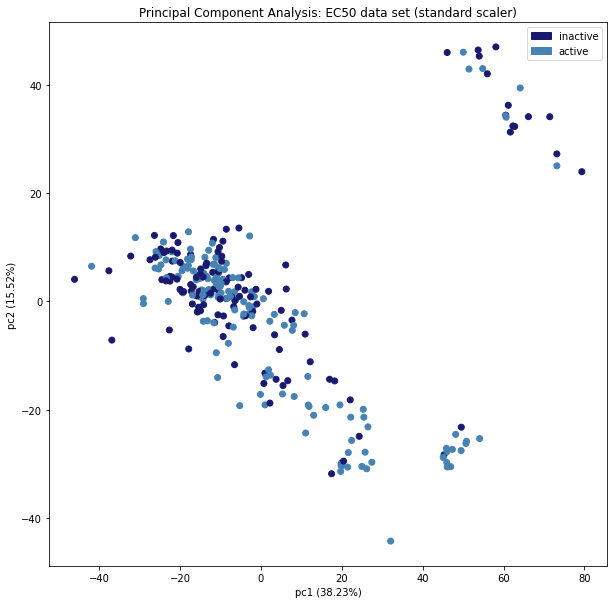

In [121]:
plt.figure(figsize=(10,10))
colors = ListedColormap(['midnightblue', 'steelblue'])

pca_scatter = plt.scatter(x[:,0],x[:,1], c=y1['Activity'], cmap= colors)

plt.title('Principal Component Analysis: EC50 data set (standard scaler)')
plt.xlabel('pc1 (38.23%)')
plt.ylabel('pc2 (15.52%)')

inactive_patch = mpatches.Patch(color='midnightblue', label='inactive')
active_patch = mpatches.Patch(color='steelblue', label='active')

plt.legend(handles=[inactive_patch, active_patch])


In [113]:
print(principal.explained_variance_ratio_)

[0.38238772 0.15521768 0.04253042 0.04124892 0.03078183]


**tSNE**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [117]:
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(scaledX)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [118]:
tsne_df = pd.DataFrame(tsne_data)
tsne_df['Activity'] = y1['Activity'].values
pd.DataFrame(tsne_df)

,0,1,Activity
0,-16.441195,2.089845,0
1,-10.889830,-7.725756,0
2,-16.407024,2.102178,1
3,6.164301,30.504936,1
4,3.038741,9.169051,0
...,...,...,...
287,9.086812,31.092951,0
288,19.234348,19.049099,0
289,8.374839,29.870935,1
290,7.778209,29.587641,0


Text(0, 0.5, 'tSNE2')

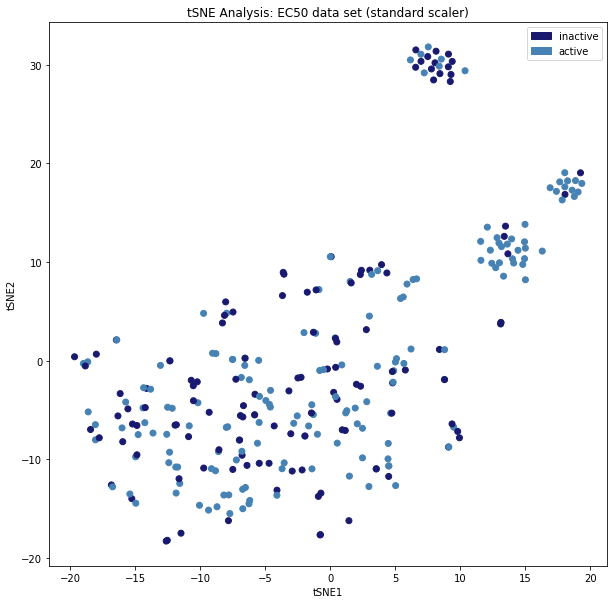

In [122]:
plt.figure(figsize=(10,10))

plt.scatter(tsne_df[0],tsne_df[1],c=tsne_df['Activity'],cmap= colors)

inactive_patch = mpatches.Patch(color='midnightblue', label='inactive')
active_patch = mpatches.Patch(color='steelblue', label='active')

plt.legend(handles=[inactive_patch, active_patch])

plt.title('tSNE Analysis: EC50 data set (standard scaler)')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')